# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4: Линейные модели, введение в конкурсную задачу


###### <hr\>
**Общая информация**

**Срок сдачи:** 17 апреля 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 17 апреля, -4 балла после 06:00 24 апреля, -6 баллов после 06:00 1 мая

Имеется ввиду именно сдача данного ДЗ, а не конечного результата по конкурсу (см ниже).<br\>
Жесткий дедлайн по конкурсной задаче - 14 мая 23:59 GMT.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Определям, что вам досталось

<center><img src='https://static1.squarespace.com/static/571a6e39b6aa608067028725/t/577988518419c2d62fb5922f/1467582555915/'></center>

Укажите свою фамилию на русском языке в поле ниже.

In [7]:
USER_NAME = u"Тескер".lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)

Имплементируйте обучение логистической регрессии с L2 регуляризацией с помощью метода Mini Batch Stochastic Gradient Descent (SGD)


#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* В Mini Batch SGD - по подвыборке объектов т.е в алгоритме надо
    * Перемешать выборку
    * Разбить на части (примерно) одинакового размера - мини батчи
    * Считать градиент по мини батчам
* Сделайте убывающую скорость спуска, например `alpha/n_epoch` или `alpha/n_iter` или `alpha/n_batch` или ...
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации/батча/эпохи.
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

## Имплементация (6 баллов)

In [157]:
def sigmoid(z): 
    return 1./(1+np.exp(-z))

from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10, batch_size=10):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        batch_size - размер batch'a
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_size = batch_size
        
    def h (self, x_elem):
        return sigmoid(-x_elem.dot(self.w))
    
    def grad (self, x, y_val):
        return x * (self.h (x) - y_val)

    def print_error (self, x, y):
        error = 0
        for i in range (x.shape[0]):
            error -= np.log (self.h(x[i])) * y[i] + (1 - np.log (self.h (x[i]))) *(1 - y[i])
        return error
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        x = np.concatenate ((X, np.ones((X.shape[0],1))), axis=1) # add extra parameter
        self.errors = []
        self.w = np.ones(x.shape[1])

        for epoch_num in range (1, self.max_epoch + 1):
            indices = np.arange(x.shape[0])
            np.random.shuffle(indices)
            local_error = 0
                        
            for batch_num in range (0, self.batch_size):
                curr_indices = indices[batch_num:batch_num + self.batch_size]
                for i in curr_indices:
                    self.w = self.w + self.alpha / epoch_num * self.grad (x[i], y[i])
                    for idx_w in range(self.w.shape[0]): # L2 regularization
                        self.w[idx_w] -= 2.0 / self.C * (self.alpha / epoch_num) * self.w[idx_w]
            self.errors.append (self.print_error (x, y))
        
        return self
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        y_hat = []
        x = np.concatenate ((X, np.ones((X.shape[0],1))), axis=1) # add extra parameter
        for i in range (x.shape[0]):
            if self.h (x[i]) > 0.5:
                y_hat.append (1)
            else:
                y_hat.append (0)
        
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''
        y_hat_proba = []
        x = np.concatenate ((X, np.ones((X.shape[0],1))), axis=1)#and we use x instead of X
        for i in range (x.shape[0]):
            y_hat_proba.append (self.h (x[i]))
        
        return y_hat_proba

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

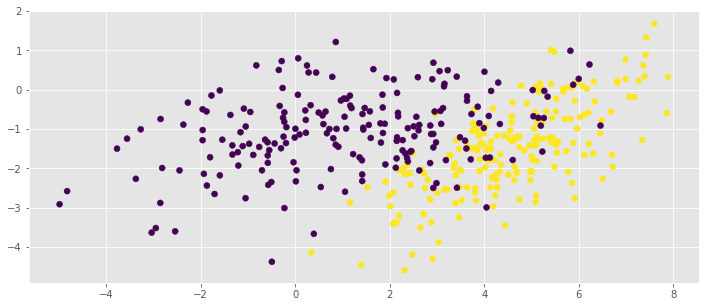

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)

In [10]:
model = MySGDClassifier(C=200, alpha=0.1, max_epoch=300, batch_size=10)
model.fit(X, y)

MySGDClassifier(C=200, alpha=0.1, batch_size=10, max_epoch=300)

weights(the last coefficient is for constant): [-0.71968392  0.64513368  2.84641445]


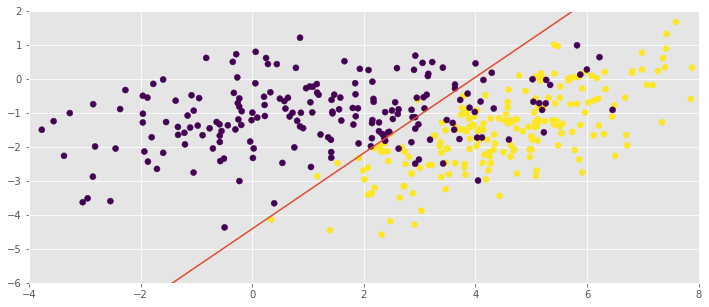

In [11]:
## Your Code Here
print "weights(the last coefficient is for constant):",model.w
plt.plot ([-4,8], [(4 * model.w[0] - model.w[2]) / model.w[1], (-8* model.w[0] - model.w[2]) / model.w[1]])
plt.scatter(X[:,0], X[:,1], c=y)
axes = plt.gca()
axes.set_xlim([-4,8])
axes.set_ylim([-6,2])
plt.show ()

## Анализ сходимости (2 балл)

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/батча/эпохи (выбрать одно) для разных `alpha`.

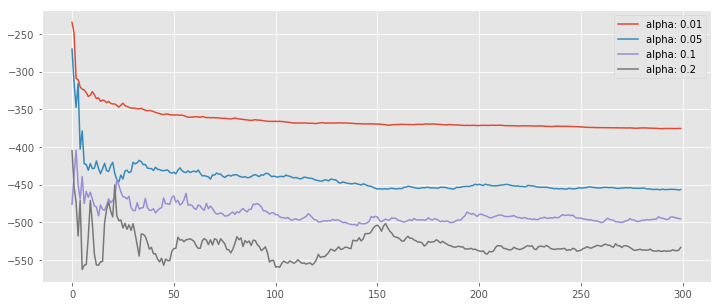

In [12]:
## Your Code Here
for alpha in (0.01, 0.05, 0.1, 0.2):
    model = MySGDClassifier(alpha=alpha, max_epoch=300, C=200, batch_size=10)
    model.fit(X, y)
    plt.plot (model.errors, label='alpha: ' + str(alpha))
plt.legend ()

Из графиков видно, что при альфа до 0.2 метод хорошо сходится. При этом результаты сильно зависят от начального приближения.

# Введение в конкурсную задачу

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная он-лайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите youtube или поиграйте сами (но не долго =) ).

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в heartstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**

### Правила
* Объединяться в команды по правилам конкурса можно, но по правилам нашего курса - нельзя)
* Вы можете использовать любой алгоритм, даже неизученный в нашем курсе (если на защите сможете объяснить как он работает)
* Имейте ввиду, что вы должны отправить результаты строго до 14 мая 23:59 GMT на сайт соревнования (раздел submission). Без результата в leaderboard оценка выставлена не будет.

## Данные

Для того, чтобы получить данные необходимо зарегистрироваться на сайте соревнования. 

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


Данные поставляются в двух форматах:
* В формате json содержится полная информация по текущему состоянию раунда
* В табличном формате упрощенная аггрерированная информация по текущему состоянию раунда

В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

## Работа с простыми табличными данными (1 балл)

По соображениям сокращения времени вычислений, проделаем основные шаги по одной части данных.

Если данные не будут помещаться вам с оперативную память, рекомендуется совершить предобработку в python, а  моделирование выполнять с помощью [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit).

In [136]:
# Загрузка данных целиком
# df_list = []
# for chunk in range(1,5):
#     filepath = './trainingData_tabular_chunk%d.csv' % chunk
#     df_list.append(pd.read_csv(filepath, sep=','))

# df_data = pd.concat(df_list)

# Загрузка одной части данных
filepath = './trainingData_tabular_chunk1.csv'
df_data = pd.read_csv(filepath, sep=',')

In [137]:
df_data.shape

(500000, 45)

In [138]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [139]:
df_data.head().T

gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1


In [140]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

0.50470199999999998

#### Задание

* Определите количество уникальных карт героя у игрока и оппонента.
* Преобразуйте категориальные переменные с помощьб one-hot кодирования, добавьте к датасету и удалите прежние столбцы


In [141]:
## Your Code Here
opponent_unique_cards = df_data.opponent_hero_card_id.unique ()
player_unique_cards = df_data.player_hero_card_id.unique ()

print "unique opponent cards: ", len (opponent_unique_cards)
print "unique player cards: ", len (player_unique_cards)

unique opponent cards:  9
unique player cards:  9


In [142]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

player_values_test = enc.fit_transform(
    df_data.player_hero_card_id.values.reshape(-1, 1)).toarray().astype(int)

opponent_values_test = OneHotEncoder().fit_transform(
    df_data.opponent_hero_card_id.values.reshape(-1, 1)).toarray().astype(int)

player_columns = ["player_hero_card_id_" + "%d" % n for n in xrange(1, player_unique_cards.shape[0] + 1)]
opponent_columns = ["opponent_hero_card_id_" + "%d" % n for n in xrange(1, opponent_unique_cards.shape[0] + 1)]
df_train_data = pd.concat([df_data,
                           pd.DataFrame(player_values_test, columns=player_columns,
                                        index=df_data.index),
                           pd.DataFrame(opponent_values_test, columns=opponent_columns,
                                        index=df_data.index)],
                           axis=1)

df_train_data.drop(['opponent_hero_card_id', 'player_hero_card_id'], axis=1, inplace=True)

In [143]:
df_train_data.head ().T

gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1
opponent_deck_count,11,19,22,17,12


## Обучение модели (1 балл)

#### Задание

* Получите матрицу объектов признаков `X` и вектор целевого признака `y`
* Обучите модуль из первой части этого ДЗ на данных

In [158]:
## Your Code Here
X = df_train_data.drop ('decision', axis=1)
y = df_train_data.decision.values

model = MySGDClassifier(alpha=0.1, max_epoch=10, C=200, batch_size=10)
model.fit (X, y)
print model.w

[-1.6595457   0.4102226   0.70522083  0.78490808  0.62482527  0.57072441
 -1.05676181  2.49184722 -1.68675113  0.70711738  1.88525404  0.47037131
  0.59892601  1.89805384 -0.93894953  1.02836701  1.08903553 -1.84878752
  1.24235813  0.94721824  0.71701632  0.6067262   0.7058568   0.47037131
  2.22980127  0.9472692   0.11603792  1.11856768  0.7058568   0.16029454
  0.32339331  0.13455877 -1.61599199  0.43877486  0.67488284  0.98515105
  0.6067262  -0.32977241  0.68284706  0.40292283 -0.45273745  0.47179964
  0.61069892  1.10058552  0.81572855  0.89811285  0.95013326  0.39166444
  0.79885786  0.54309965  0.35218234  0.47211561  1.03304322  0.02475291
  1.19792268  0.66830614  1.66600233  0.68810147  0.478254    0.61235051]


## Применение модели (3 балла)
#### Задание
* Загрузите тестовые данные
* Выполните те же операции с датасетом, что и с обучающей выборкой
* Примените модель и загрузите решение на страницу конкурса
* Напечатайте ваш ник и оценку качества, полученную после загрузки

Судя по описанию, submission file должен состоять из одного столбца с числами, соответствующим вероятностям победы игрока.

In [145]:
## Your Code Here
data_list = []
for chunk in (5, 6, 7):
    filepath = 'testData_tabular_chunk%d.csv' % chunk
    data_list.append(pd.read_csv(filepath, sep=','))

df_test_data = pd.concat(data_list)

In [146]:
df_test_data.shape

(1250000, 45)

In [147]:
# для удобства
df_test_data.columns = df_test_data.columns.str.replace('.', '_')
df_test_data = df_test_data.set_index('gamestate_id')

In [148]:
df_test_data.head().T

gamestate_id,1304374.0,4383331.0,3544947.0,4282915.0,4327924.0
decision,NaN,NaN,NaN,NaN,NaN
turn,5.0,9.0,16.0,3.0,5.0
opponent_armor,0.0,0.0,0.0,0.0,0.0
opponent_attack,0.0,3.0,0.0,0.0,0.0
opponent_hero_card_id,981.0,754.0,798.0,326.0,25.0
opponent_hp,23.0,16.0,16.0,30.0,30.0
opponent_special_skill_used,0.0,0.0,1.0,0.0,0.0
opponent_weapon_durability,0.0,1.0,0.0,0.0,0.0
opponent_crystals_all,4.0,8.0,10.0,2.0,4.0
opponent_crystals_current,0.0,3.0,2.0,2.0,1.0


In [149]:
opponent_unique_cards = df_test_data.opponent_hero_card_id.unique ()
player_unique_cards = df_test_data.player_hero_card_id.unique ()

enc = OneHotEncoder()
player_values_test = enc.fit_transform(
    df_test_data.player_hero_card_id.values.reshape(-1, 1)).toarray().astype(int)

opponent_values_test = OneHotEncoder().fit_transform(
    df_test_data.opponent_hero_card_id.values.reshape(-1, 1)).toarray().astype(int)

player_columns = ["player_hero_card_id_" + "%d" % n for n in xrange(1, player_unique_cards.shape[0] + 1)]
opponent_columns = ["opponent_hero_card_id_" + "%d" % n for n in xrange(1, opponent_unique_cards.shape[0] + 1)]
df_test_modified_data = pd.concat([df_test_data,
                           pd.DataFrame(player_values_test, columns=player_columns,
                                        index=df_test_data.index),
                           pd.DataFrame(opponent_values_test, columns=opponent_columns,
                                        index=df_test_data.index)],
                           axis=1)

df_test_modified_data.drop(['opponent_hero_card_id', 'player_hero_card_id'], axis=1, inplace=True)

In [150]:
df_test_modified_data.head().T

gamestate_id,1304374.0,4383331.0,3544947.0,4282915.0,4327924.0
decision,NaN,NaN,NaN,NaN,NaN
turn,5.0,9.0,16.0,3.0,5.0
opponent_armor,0.0,0.0,0.0,0.0,0.0
opponent_attack,0.0,3.0,0.0,0.0,0.0
opponent_hp,23.0,16.0,16.0,30.0,30.0
opponent_special_skill_used,0.0,0.0,1.0,0.0,0.0
opponent_weapon_durability,0.0,1.0,0.0,0.0,0.0
opponent_crystals_all,4.0,8.0,10.0,2.0,4.0
opponent_crystals_current,0.0,3.0,2.0,2.0,1.0
opponent_deck_count,21.0,17.0,9.0,24.0,22.0


In [159]:
X_test = df_test_modified_data.drop ('decision', axis=1)

scores = model.predict_proba(X_test)
scores

[0.9999995879755218,
 0.99882146654193904,
 0.99999999999999911,
 0.20701422242388354,
 0.99994374850552126,
 1.0,
 0.99899900336653735,
 2.5058858374809221e-33,
 5.3750676809615378e-08,
 0.00081075526991311283,
 0.99973643602244044,
 4.2877361176539549e-24,
 5.7567414187505551e-09,
 5.476405781579182e-06,
 7.5636707145810651e-14,
 0.94173138456024641,
 0.0029645993981745125,
 0.038213583569976672,
 7.2774757182201327e-09,
 1.1901285560390989e-19,
 0.3815711615191924,
 1.1069335163074147e-06,
 0.60341102913935041,
 0.035786836024176011,
 4.2250641695823616e-40,
 0.74774419296878425,
 0.99999999999984901,
 0.99884846257594118,
 9.3180259748168113e-08,
 4.1586905774722575e-10,
 0.63546457473800744,
 0.99856410271817408,
 7.0285745923441834e-12,
 0.026996751215192943,
 3.3044694361744198e-09,
 0.015962120676518549,
 4.1391756645239402e-20,
 0.00048340405557650054,
 4.4817041190037022e-19,
 5.9115845119348416e-09,
 1.6231547675672147e-12,
 9.0161777709833161e-06,
 2.5051704606229503e-18,
 

In [161]:
np.savetxt("result_scores.txt", scores, fmt='%.20f')